In [ ]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

data = pd.read_csv('/content/drive/MyDrive/MLDL_Dataset/housepricedata.csv')

data.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [ ]:
dataset = data.values

dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [ ]:
X = dataset[:,0:10]

X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]])

In [ ]:
Y = dataset[:,10]

Y

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=130,
          validation_data=(X_val, Y_val))


y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

print(classification_report(Y_test, y_pred))

model.evaluate(X_test, Y_test)[1]

Epoch 1/130
32/32 [==============================] - 1s 19ms/step - loss: 0.2575 - accuracy: 0.8875 - val_loss: 0.2199 - val_accuracy: 0.9087
Epoch 2/130
32/32 [==============================] - 0s 11ms/step - loss: 0.2567 - accuracy: 0.8914 - val_loss: 0.2210 - val_accuracy: 0.9132
Epoch 3/130
32/32 [==============================] - 0s 10ms/step - loss: 0.2566 - accuracy: 0.8894 - val_loss: 0.2176 - val_accuracy: 0.9178
Epoch 4/130
32/32 [==============================] - 0s 15ms/step - loss: 0.2567 - accuracy: 0.8914 - val_loss: 0.2225 - val_accuracy: 0.9132
Epoch 5/130
32/32 [==============================] - 0s 6ms/step - loss: 0.2560 - accuracy: 0.8894 - val_loss: 0.2186 - val_accuracy: 0.9132
Epoch 6/130
32/32 [==============================] - 0s 5ms/step - loss: 0.2562 - accuracy: 0.8914 - val_loss: 0.2189 - val_accuracy: 0.9087
Epoch 7/130
32/32 [==============================] - 0s 5ms/step - loss: 0.2565 - accuracy: 0.8885 - val_loss: 0.2178 - val_accuracy: 0.9132
Epoch 8/1

0.9086757898330688

In [ ]:
accuracy = accuracy_score(Y_test,y_pred)*100

confusion_mat = confusion_matrix(Y_test,y_pred)

print("Accuracy for Neural Network is:",accuracy)
print(classification_report(Y_test, y_pred))

Accuracy for Neural Network is: 91.32420091324201
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       123
           1       0.91      0.89      0.90        96

    accuracy                           0.91       219
   macro avg       0.91      0.91      0.91       219
weighted avg       0.91      0.91      0.91       219



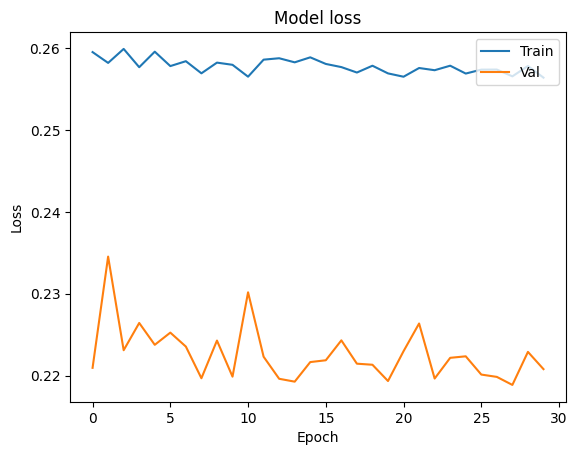

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

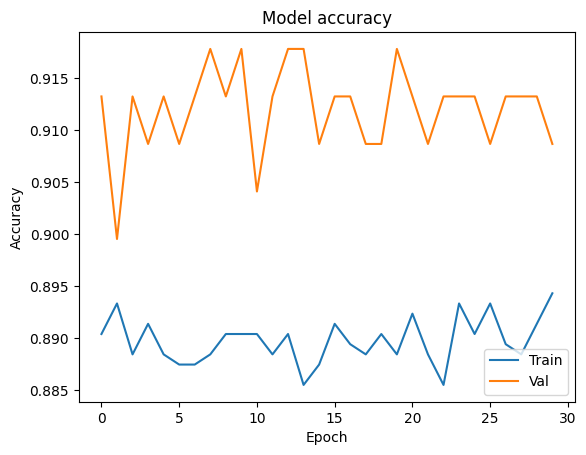

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()